### Strategy:
* Check the relative strength index, and we will determine if the stock is being over bought or over sold
* If a stock is overbought, it is time to sell
* If a stock is oversold, it is time to buy
* standard time period for checking the above is 14 days
* if RSI is above 70, it is considered as overbought
* If RSI is below 30, it is considered as oversold

In [1]:
import numpy as np
import pandas as pd
from yahoo_finance_api import YahooFinance as yf
import matplotlib.pyplot as plt

In [8]:
stock = yf('DIAMINESQ.BO', result_range='1y', interval='1d', dropna='True').result
stock

C:\Users\Arjun Janamatti\Anaconda3\envs\tf_nptel\lib\site-packages\yahoo_finance_api-0.0.1-py3.6.egg\yahoo_finance_api\__init__.py:73: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


,Open,High,Low,Close,Volume
2019-07-17 09:15:00,123.00,127.95,123.00,126.75,1188.0
2019-07-18 09:15:00,127.85,127.85,123.35,124.95,903.0
2019-07-19 09:15:00,123.00,123.00,116.55,118.10,2823.0
2019-07-22 09:15:00,118.00,118.00,115.00,116.00,1616.0
2019-07-23 09:15:00,115.10,120.00,115.05,119.90,728.0
...,...,...,...,...,...
2020-07-13 09:15:00,340.00,345.00,328.00,337.25,56347.0
2020-07-14 09:15:00,337.00,337.00,320.00,327.10,31299.0
2020-07-15 09:15:00,327.80,332.00,307.00,309.00,26480.0
2020-07-16 09:15:00,309.40,317.00,292.00,297.00,32928.0


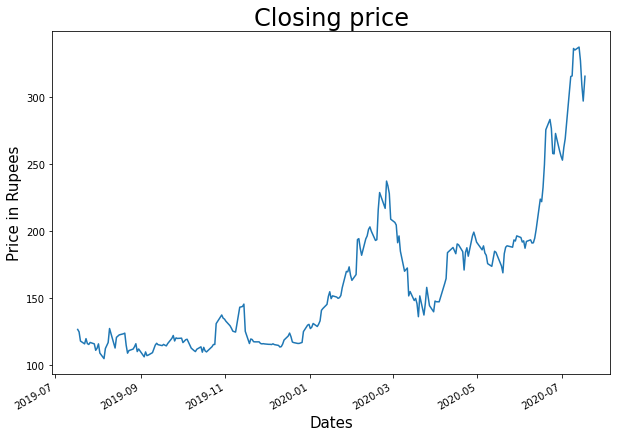

In [12]:
stock["Close"].plot(figsize = (10,7))
plt.title('Closing price', fontsize = 24)
plt.xlabel("Dates", fontsize = 15)
plt.ylabel('Price in Rupees', fontsize = 15)
plt.show()

In [14]:
# RSI calculation

# difference in price from previous day
delta = stock['Close'].diff(1)
delta = delta.dropna()
delta

2019-07-18 09:15:00    -1.80
2019-07-19 09:15:00    -6.85
2019-07-22 09:15:00    -2.10
2019-07-23 09:15:00     3.90
2019-07-24 09:15:00    -3.70
                       ...  
2020-07-13 09:15:00     2.20
2020-07-14 09:15:00   -10.15
2020-07-15 09:15:00   -18.10
2020-07-16 09:15:00   -12.00
2020-07-17 15:29:48    18.50
Name: Close, Length: 244, dtype: float64

In [17]:
# seggregate the positive and negative values in delta

positive = delta.copy()
negative = delta.copy()

positive[positive < 0] = 0
negative[negative > 0] = 0


In [20]:
time_period = 14

# average gain and avarage loss
average_gain = positive.rolling(window = time_period).mean()
average_loss = abs(negative.rolling(window = time_period).mean())

In [21]:
# relative strength calculation

RS = average_gain / average_loss

# relative strength index (RSI)

RSI = 100 - (100 / (1 + RS))
RSI

2019-07-18 09:15:00          NaN
2019-07-19 09:15:00          NaN
2019-07-22 09:15:00          NaN
2019-07-23 09:15:00          NaN
2019-07-24 09:15:00          NaN
                         ...    
2020-07-13 09:15:00    71.586060
2020-07-14 09:15:00    76.192279
2020-07-15 09:15:00    67.122374
2020-07-16 09:15:00    58.228279
2020-07-17 15:29:48    68.365669
Name: Close, Length: 244, dtype: float64

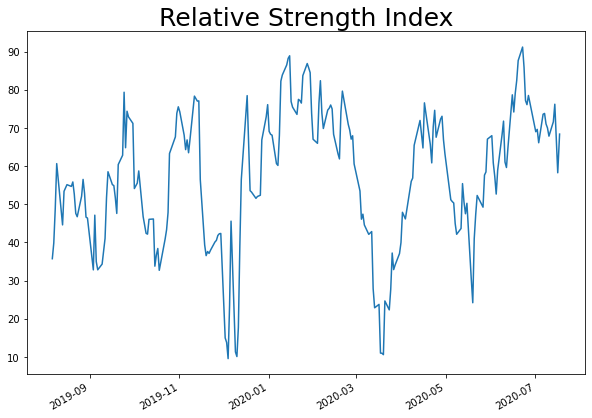

In [25]:
# visualize the RSI values

RSI.plot(figsize=(10,7))
plt.title("Relative Strength Index", fontsize = 25)
plt.show()

In [26]:
new_df = pd.DataFrame()
new_df['close'] = stock['Close']
new_df['RSI'] = RSI
new_df

,close,RSI
2019-07-17 09:15:00,126.75,NaN
2019-07-18 09:15:00,124.95,NaN
2019-07-19 09:15:00,118.10,NaN
2019-07-22 09:15:00,116.00,NaN
2019-07-23 09:15:00,119.90,NaN
...,...,...
2020-07-13 09:15:00,337.25,71.586060
2020-07-14 09:15:00,327.10,76.192279
2020-07-15 09:15:00,309.00,67.122374
2020-07-16 09:15:00,297.00,58.228279


Text(0.5, 1.0, 'Stock price with RSI Plot')

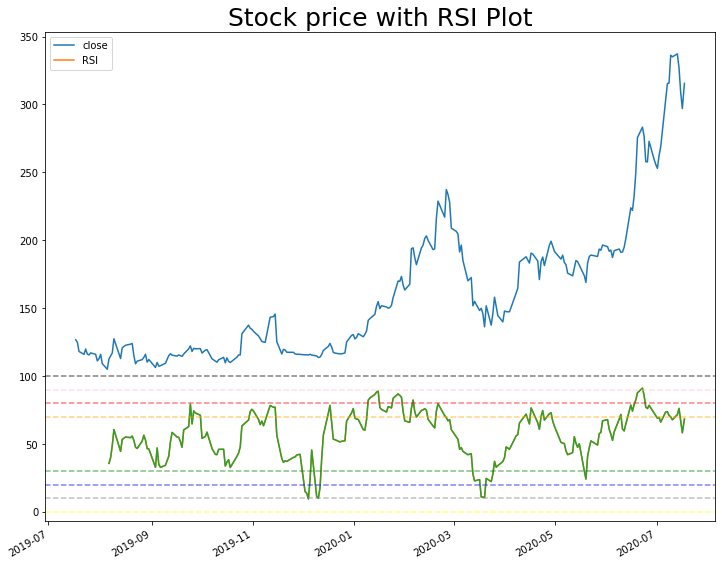

In [33]:
new_df.plot(figsize = (12,10))
# plt.show()
plt.plot(new_df.index, new_df["RSI"])
plt.axhline(0, linestyle = '--', alpha = 0.5, color = 'yellow')
plt.axhline(10, linestyle = '--', alpha = 0.5, color = 'gray')
plt.axhline(20, linestyle = '--', alpha = 0.5, color = 'blue')
plt.axhline(30, linestyle = '--', alpha = 0.5, color = 'green')
plt.axhline(70, linestyle = '--', alpha = 0.5, color = 'orange')
plt.axhline(80, linestyle = '--', alpha = 0.5, color = 'red')
plt.axhline(90, linestyle = '--', alpha = 0.5, color = 'pink')
plt.axhline(100, linestyle = '--', alpha = 0.5, color = 'black')
plt.title('Stock price with RSI Plot', fontsize = 25)

* Around april 2020, the RSI value was near to 20, at teh same tim